### From Scratch Implemetation of a Simple Perceptron
### Author: @Samashi47

### Imports

In [40]:
from perceptron import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, auc, roc_curve, ConfusionMatrixDisplay
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

### Load breast cancer dataset 

In [41]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Fitting the Perceptron model

In [42]:
perceptron = Perceptron(epochs=2000, alpha=0.01)
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)

c:\Users\ah-ma\Documents\GitHub\Multi-Layer-Perceptron\perceptron.py:14: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


### Classification report

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        43
           1       1.00      0.93      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



### Confusion Matrix heatmap plot

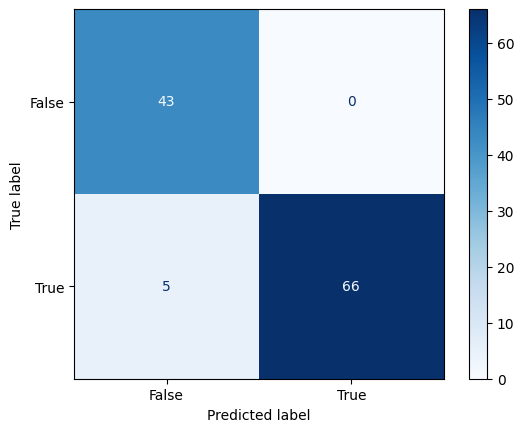

In [44]:
disp = ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred, display_labels=["False", "True"], cmap='Blues')
plt.show()

### ROC Curve

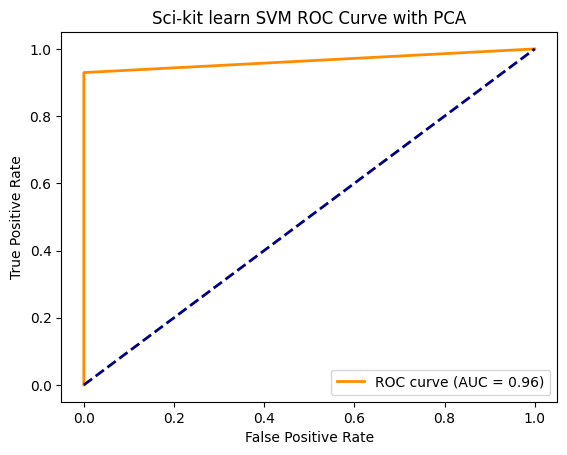

In [45]:
# Calculer FP ratio, TP ratio
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Sci-kit learn SVM ROC Curve with PCA')
plt.legend(loc='lower right')
plt.show()